<a href="https://colab.research.google.com/github/ano74/BCS_Drowsiness_Detection/blob/main/Mini_Project_MNE/Analysis_Oddball_Anupama_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 19.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import mne
import matplotlib.pyplot as plt

In [ ]:
cd /content/drive/MyDrive/BCS_drowsiness_detection

/content/drive/MyDrive/BCS_drowsiness_detection


In [ ]:
fname = "oddball_example_small-fif.gz"

## Read in raw data; raw objects

In [ ]:
# raw = mne.io.read_raw_fif(fname) this only links the file, doesnt load it

raw = mne.io.read_raw_fif(fname, preload=True) #Now, it has been loaded

Opening raw data file oddball_example_small-fif.gz...


<ipython-input-6-0f53a30c58d0>:3: RuntimeWarning: This filename (oddball_example_small-fif.gz) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fname, preload=True) #Now, it has been loaded


Isotrak not found
    Range : 2903 ... 112000 =     29.030 ...  1120.000 secs
Ready.
Reading 0 ... 109097  =      0.000 ...  1090.970 secs...


In [ ]:
type(raw)

mne.io.fiff.raw.Raw

In [ ]:
raw.filter(1,20) #filters frequencies from 1 to 20 Hz

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 331 samples (3.310 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


<Raw | oddball_example_small-fif.gz, 64 x 109098 (1091.0 s), ~53.3 MB, data loaded>

Using matplotlib as 2D backend.


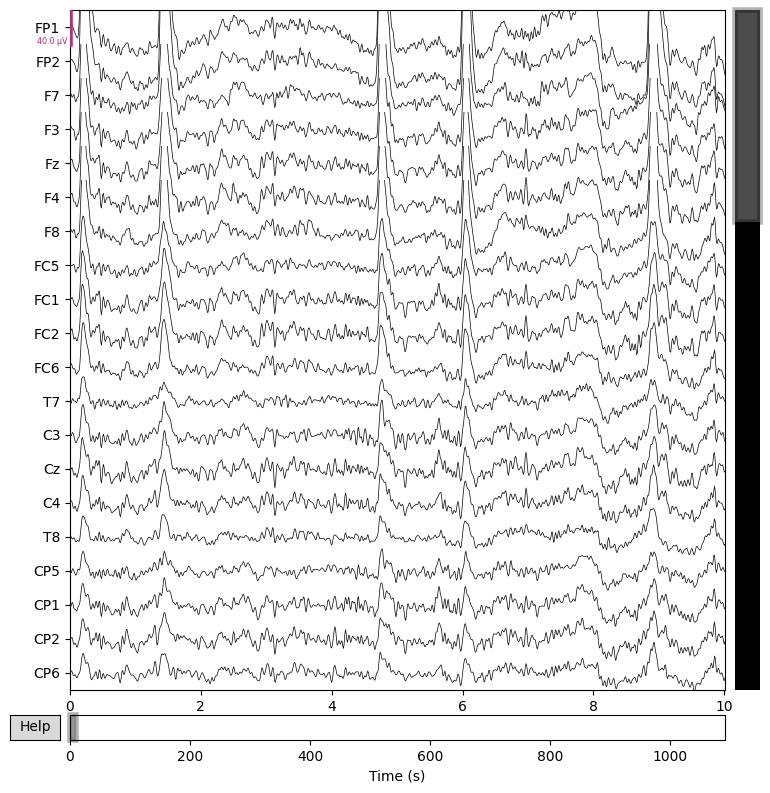

In [ ]:
raw.plot();

Independent Component Analysis - used to correct artifacts.

For this, an ICA object is created and its `.fit` method is used on a copy of the filtered raw data object.

Independent Component Analysis is a statstical method which over here is used to seperate mixed signals based on region of electrical activity.

After seperating the components, we can easily remove artifacts like ones caused due to eye blinks etc.

In [ ]:
ica = mne.preprocessing.ICA(n_components = 20, random_state = 0)

In [ ]:
ica.fit(raw.copy().filter(8,35))

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 165 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 26.8s.


<ICA | raw data decomposition, method: fastica (fit in 72 iterations on 109098 samples), 20 ICA components (63 PCA components available), channel types: eeg, no sources marked for exclusion>

### 1. Manual artifact detection

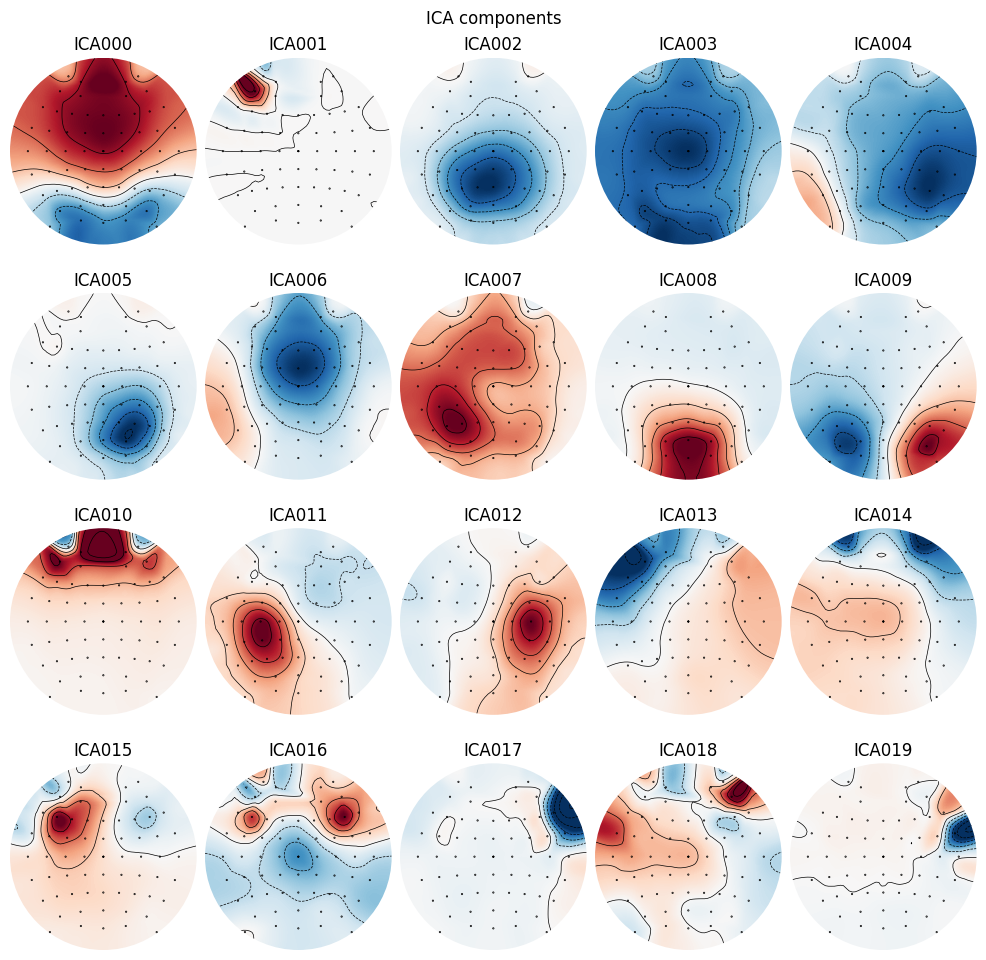

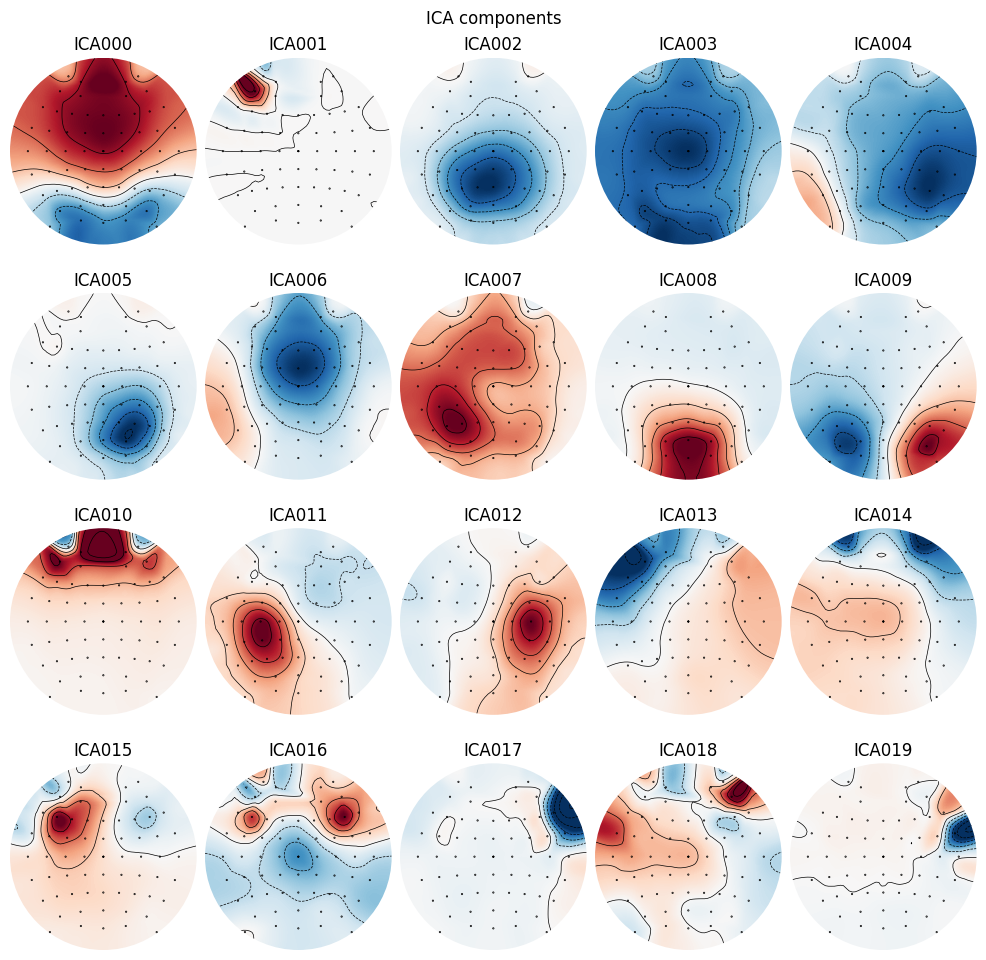

In [ ]:
ica.plot_components(outlines="head")

We store the "bad" components in the ica object as a list of indexes.

In [ ]:
ica.exclude = [1,10,16,18,19]  #These indexes show the eye region as source of electrical activity making them potential artifacts.

### 2. Automatic artifact detection

We could use a built-in algorithm to do this as well

In [ ]:
bad_idx, scores = ica.find_bads_eog(raw, 'SO2', threshold=2)
print(bad_idx)

Using EOG channel: SO2
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1000 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Comparing raw and corrected data

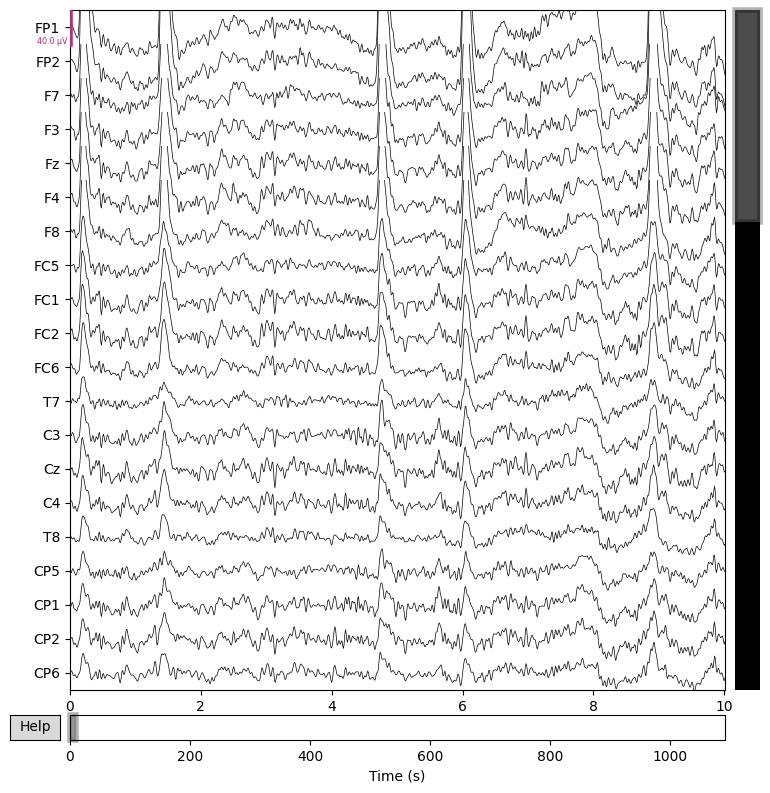

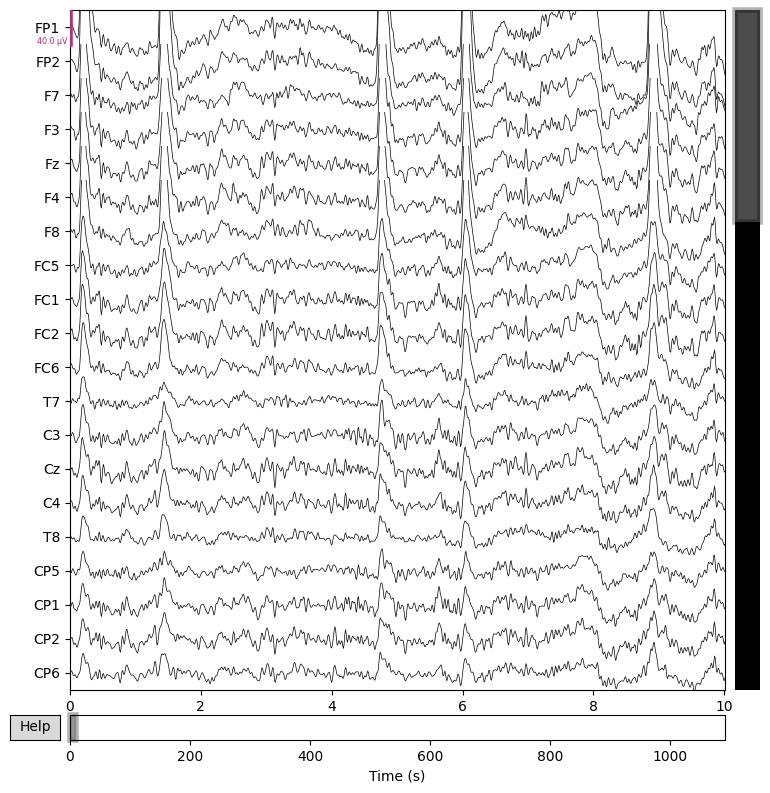

In [ ]:
raw.plot()

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 5 ICA components
    Projecting back using 63 PCA components


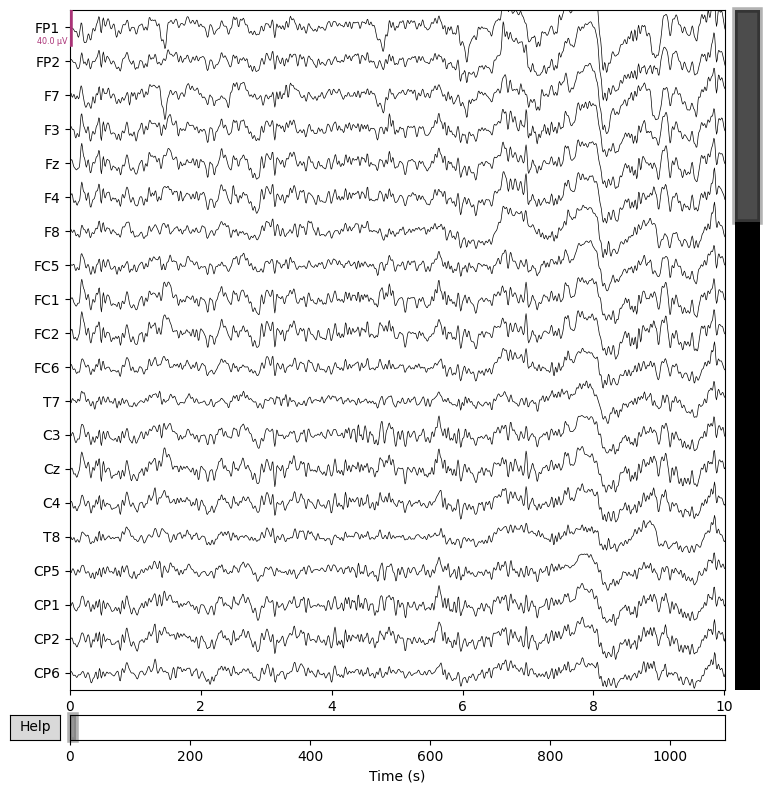

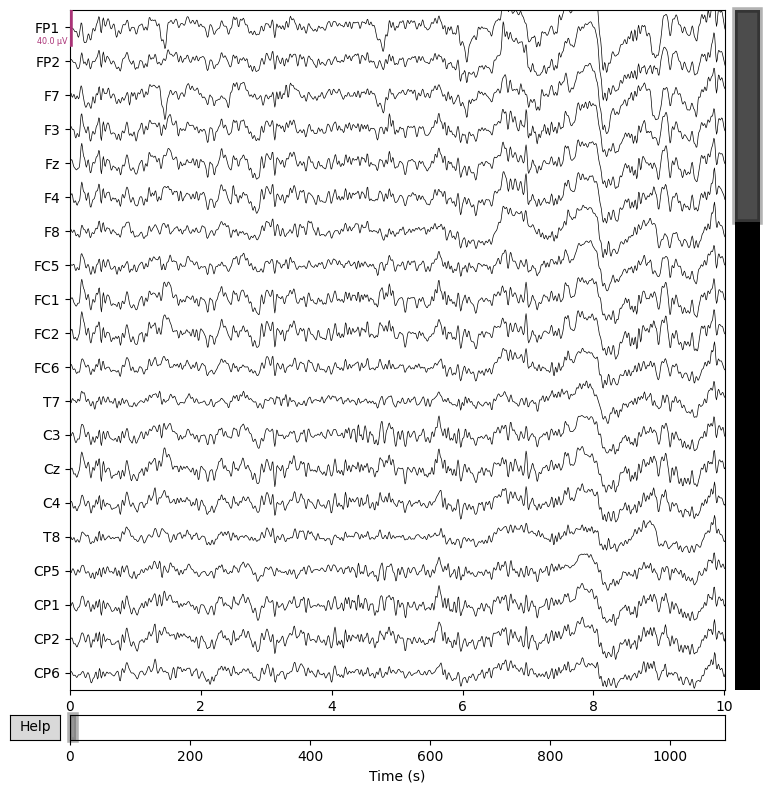

In [ ]:
ica.apply(raw.copy(), exclude = ica.exclude).plot()

## Epochs

For epoching the data, we need event markers. These are stored in the `raw` object as a stimulus channel.

In [ ]:
events = mne.find_events(raw)

903 events found on stim channel STI 014
Event IDs: [100 200]


`events` is an array(time, zero, trigger)

In [ ]:
events

array([[  3241,      0,    200],
       [  3437,      0,    200],
       [  3643,      0,    200],
       ...,
       [111496,      0,    200],
       [111613,      0,    200],
       [111719,      0,    200]])

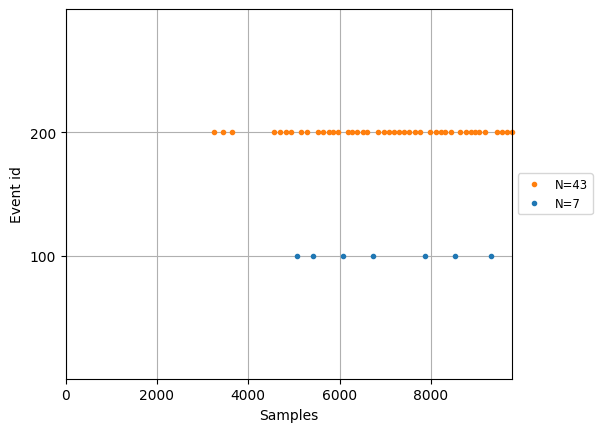

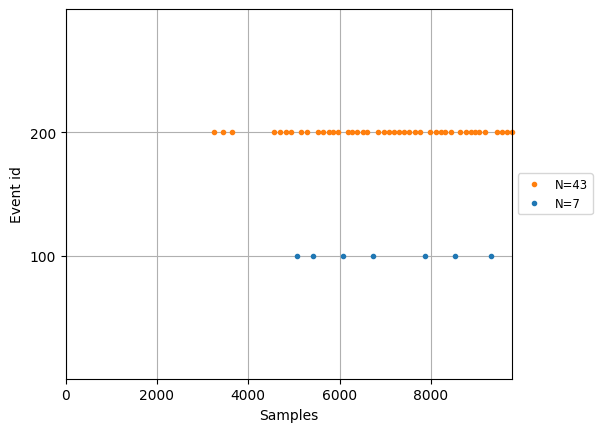

In [ ]:
mne.viz.plot_events(events[:50])

For creating an `mne.Epochs` object, we require, in addition to the `raw` object and the `events` array, a dictionary of the intended condition names and corresponding trigger numbers.

In [ ]:
event_ids = {"standard/stimulus": 200, "target/stimulus": 100}

epochs = mne.Epochs(raw, events, event_id = event_ids, preload = True)

Not setting metadata
903 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 903 events and 71 original time points ...
0 bad epochs dropped


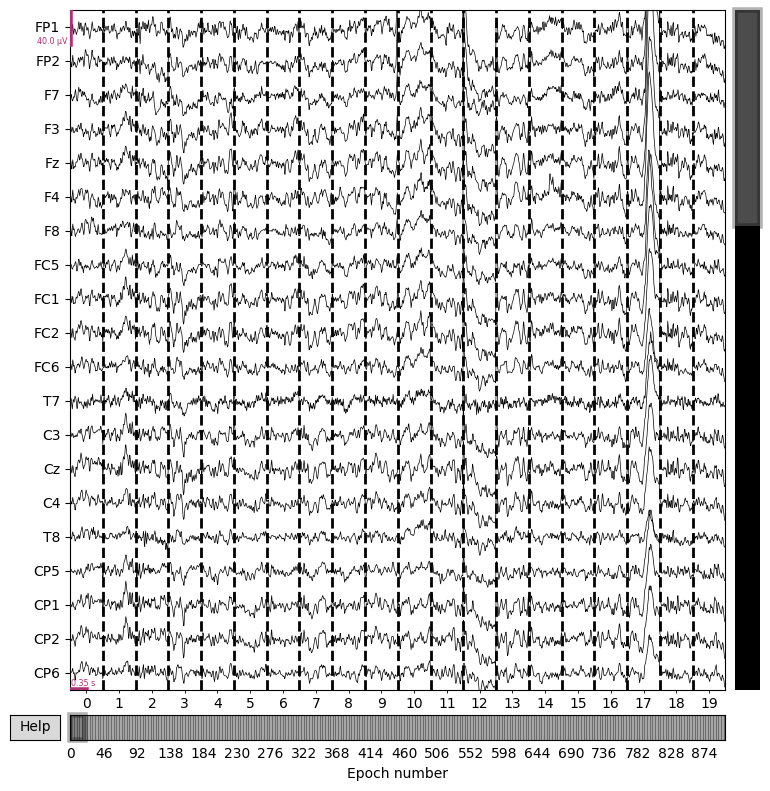

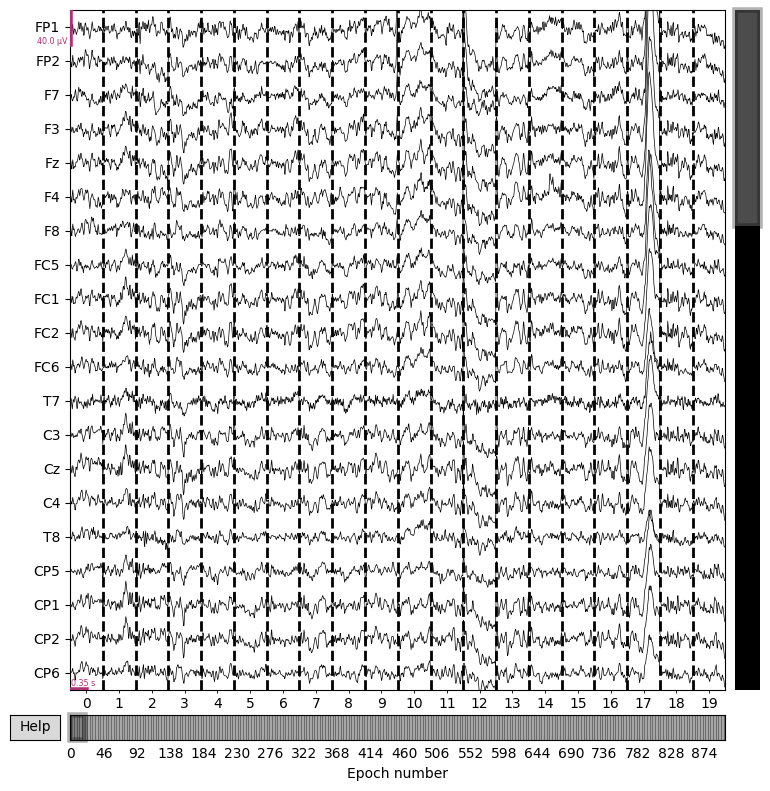

In [ ]:
epochs.plot()

In [ ]:
epochs = ica.apply(epochs, exclude = ica.exclude)

Applying ICA to Epochs instance
    Transforming to ICA space (20 components)
    Zeroing out 5 ICA components
    Projecting back using 63 PCA components


<ipython-input-44-b9f0ca16a9b0>:1: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  epochs = ica.apply(epochs, exclude = ica.exclude)


Baseline period - before an external event occurs

Post-stimulus interval - the time after an external event occurs.

EEG activity during the baseline period is used to correct activity over the post stimulus interval by subtracting the mean of a baseline period from every time point of the baseline and post-stimulus interval.

In [ ]:
epochs.apply_baseline((None,0))

Applying baseline correction (mode: mean)


<Epochs |  903 events (all good), -0.2 – 0.5 s, baseline -0.2 – 0 s, ~31.4 MB, data loaded,
 'standard/stimulus': 797
 'target/stimulus': 106>

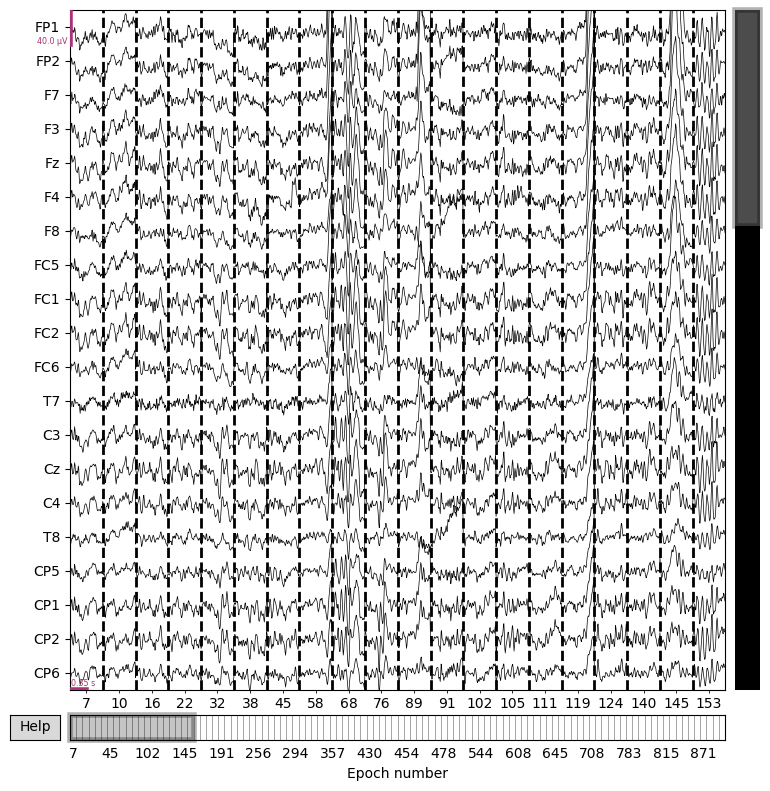

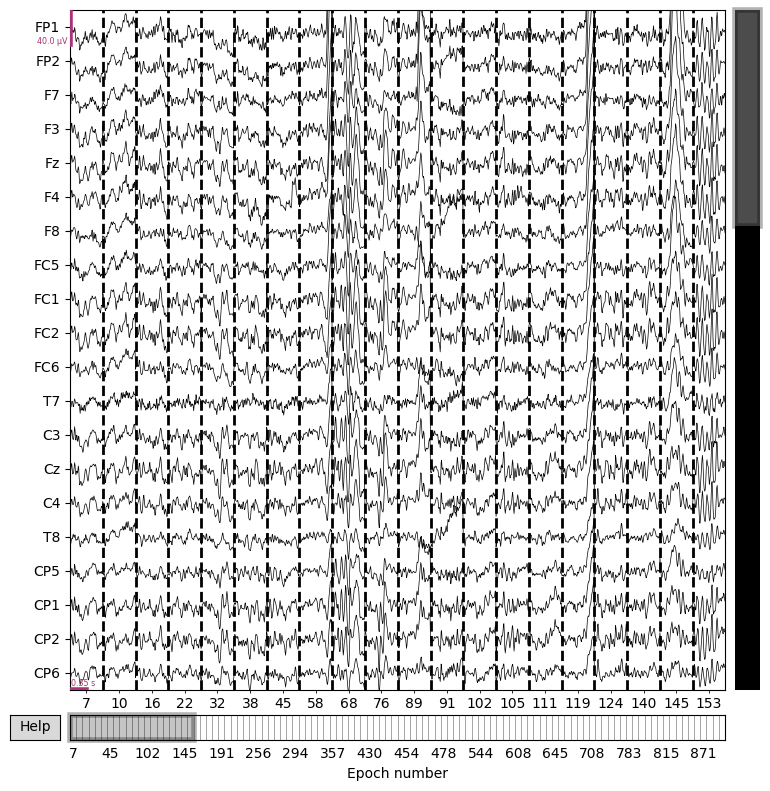

In [ ]:
epochs["target"].plot()

In [ ]:
epochs["stimulus"]

<Epochs |  903 events (all good), -0.2 – 0.5 s, baseline -0.2 – 0 s, ~31.4 MB, data loaded,
 'standard/stimulus': 797
 'target/stimulus': 106>

In [ ]:
epochs.info

<Info | 10 non-empty values
 bads: []
 ch_names: FP1, FP2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, T7, C3, Cz, ...
 chs: 63 EEG, 1 Stimulus
 custom_ref_applied: True
 file_id: 4 items (dict)
 highpass: 1.0 Hz
 lowpass: 20.0 Hz
 meas_date: 2017-08-10 20:05:16 UTC
 meas_id: 4 items (dict)
 nchan: 64
 projs: []
 sfreq: 100.0 Hz
>

Not setting metadata
106 matching events found
No baseline correction applied
0 projection items activated


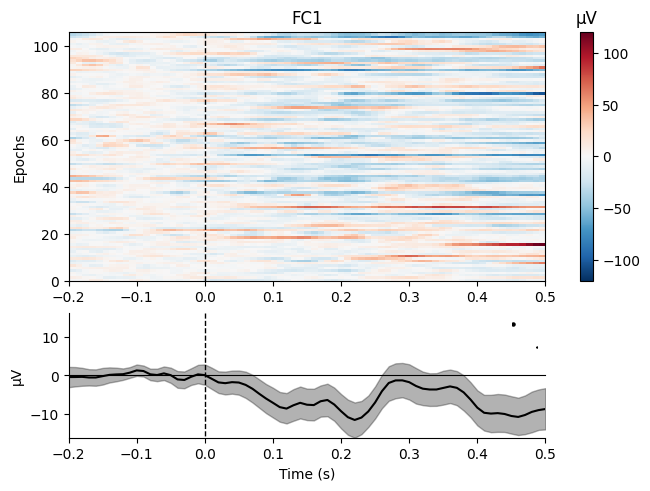

[<Figure size 640x480 with 4 Axes>]

In [ ]:
epochs["target"].plot_image(picks=[8])

In [ ]:
epochs.equalize_event_counts(event_ids)
epochs

Dropped 691 epochs: 0, 1, 2, 3, 4, 5, 6, 9, 12, 13, 14, 15, 18, 19, 20, 21, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 36, 39, 40, 41, 42, 43, 44, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 69, 70, 71, 72, 73, 74, 75, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 104, 107, 108, 109, 110, 113, 114, 115, 116, 117, 118, 121, 122, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 141, 142, 143, 146, 147, 148, 149, 150, 151, 154, 155, 156, 157, 158, 159, 160, 161, 162, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 187, 188, 193, 194, 197, 198, 199, 200, 201, 202, 203, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 248, 249, 252, 253, 254, 257, 260, 261, 262, 263, 266, 267, 268, 269, 270, 271, 274, 275, 276, 277, 278, 279, 280,

<Epochs |  212 events (all good), -0.2 – 0.5 s, baseline -0.2 – 0 s, ~7.4 MB, data loaded,
 'standard/stimulus': 106
 'target/stimulus': 106>

In [ ]:
epochs.save("oddball-epo.fif")

In [ ]:
ls

Iris.csv             NB2.ipynb                     Week2_Task1_Anupama.ipynb
Mini_project1.ipynb  oddball-epo.fif               Week2_Task2_Anupama.ipynb
NB1.ipynb            oddball_example_small-fif.gz  Week3_Task1.ipynb


In [ ]:
epochs_for_tfr = mne.Epochs(raw, events, event_id = event_ids, tmin=-.5, tmax=1.5, preload=True)

Not setting metadata
903 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 903 events and 201 original time points ...
0 bad epochs dropped


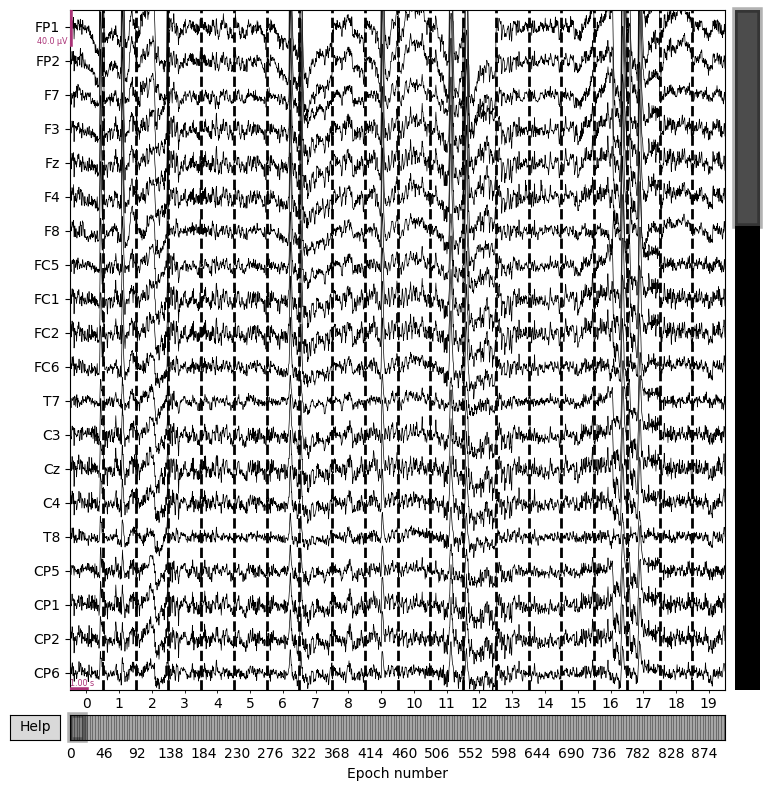

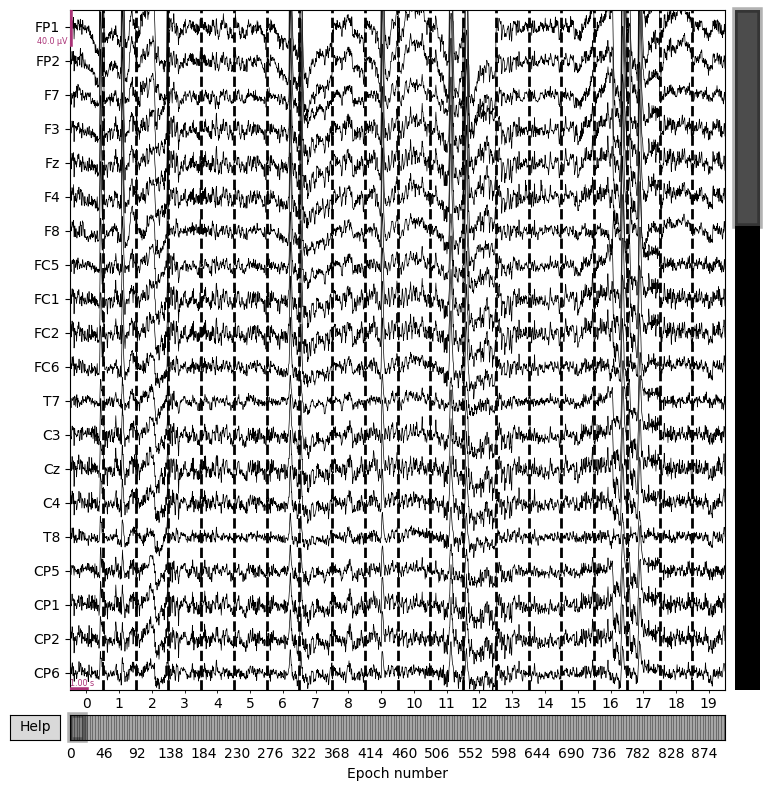

In [ ]:
epochs_for_tfr.plot()

In [ ]:
epochs_for_tfr = ica.apply(epochs_for_tfr, exclude = ica.exclude)

epochs_for_tfr.equalize_event_counts(event_ids)

epochs_for_tfr.save("oddball-long-epo.fif")

Applying ICA to Epochs instance


<ipython-input-56-833166aa445b>:1: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  epochs_for_tfr = ica.apply(epochs_for_tfr, exclude = ica.exclude)


    Transforming to ICA space (20 components)
    Zeroing out 5 ICA components
    Projecting back using 63 PCA components
Dropped 691 epochs: 0, 1, 2, 3, 4, 5, 6, 9, 12, 13, 14, 15, 18, 19, 20, 21, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 36, 39, 40, 41, 42, 43, 44, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 69, 70, 71, 72, 73, 74, 75, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 104, 107, 108, 109, 110, 113, 114, 115, 116, 117, 118, 121, 122, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 141, 142, 143, 146, 147, 148, 149, 150, 151, 154, 155, 156, 157, 158, 159, 160, 161, 162, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 187, 188, 193, 194, 197, 198, 199, 200, 201, 202, 203, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 2

In [ ]:
X = epochs.get_data() #numpy array
X.shape #no. of observations(106+106), 63 channel + 1 stimulus channel, time points

<ipython-input-58-9e48b92d0ee5>:1: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X = epochs.get_data() #numpy array


(212, 64, 71)